<a href="https://colab.research.google.com/github/realBarnaby/projects/blob/main/DL_beadando_javitott.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Beadandó feladat!

Deep Learning 2024 beadandó feladat!

Készítsen az alábbiakban letölthető fájlok segítségével egy a röntgen felvételeket értékelő bináris osztályozót. A felvételeken egészséges és beteg emberekhez tartozó röntgen képek találhatóak.
A feladatot konvolúciós neurális hálózat segítségével valósítsa meg!
Használjon korai leállítást, értékelje a modellt annak a pontosságával!
Rajzolja ki a költségfügvény alakaulását (Loss) és szövegesen értékelje ki!
Az elkészült modellt mentse el.
A test adatokon értékelje a modelljét!
A legjobb eredményt (pontosságot) folyamatosan megosztom a Teamsben.

Többször is lehet megoldást beküldeni.

Értékelés: az önáltal elért eredmény(pontosság)/legjobb eredmény(pontosság)*100

5: 98-

4: 96-97,99

3: 93-95,99

2: 92,99 alatt

1: nem működik

Beküldési határidő: 2024.december 22.

In [1]:
!gdown 1FfgdLCOpDlJZLp0MGohTh1sf4LgHICrN

Downloading...
From (original): https://drive.google.com/uc?id=1FfgdLCOpDlJZLp0MGohTh1sf4LgHICrN
From (redirected): https://drive.google.com/uc?id=1FfgdLCOpDlJZLp0MGohTh1sf4LgHICrN&confirm=t&uuid=c6b3dd4c-e0df-4c71-af28-bc31245c4d10
To: /content/DL_beadandó.zip
100% 412M/412M [00:07<00:00, 57.2MB/s]


In [2]:
!unzip DL_beadandó.zip -d XRAY

Archive:  DL_beadandó.zip
   creating: XRAY/test/
   creating: XRAY/test/NORMAL/
  inflating: XRAY/test/NORMAL/IM-0001-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0003-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0005-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0006-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0007-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0009-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0010-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0011-0001-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0011-0001-0002.jpeg  
  inflating: XRAY/test/NORMAL/IM-0011-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0013-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0015-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0016-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0017-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0019-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0021-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0022-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0023-0001.jpeg  
  inflati

In [3]:
 import os
 os.environ['TF_USE_LEGACY_KERAS']='1'

# Ellenőrizzük a GPU-t

In [4]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


#Töltsük be a képeket ImageDataGenerator segítségével

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "XRAY/train/"
test_dir = "XRAY/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="binary")

print("Testing images:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="binary")

Training images:
Found 1000 images belonging to 2 classes.
Testing images:
Found 624 images belonging to 2 classes.


#class_names listába töltsük be az osztályok neveit

In [6]:
import pathlib
import numpy as np
data_dir = pathlib.Path("XRAY/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_nmaes from the subdirectories
print(class_names)

['NORMAL' 'PNEUMONIA']


In [7]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [8]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [9]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1000 images belonging to 2 classes.


In [13]:
# Get data batch samples
images, labels = train_data.__next__()
augmented_images, augmented_labels = train_data_augmented_shuffled.__next__() # Note: labels aren't augmented, they stay the same

#állítsuk össze a modellt

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Dropout , BatchNormalization
from tensorflow.keras import Sequential
# Define the Sequential model
model = tf.keras.Sequential([
    Conv2D(32 , 3, activation='relu', input_shape=(224, 224, 3)),
    #BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),

    Conv2D(64 , 3 , activation='relu', input_shape=(224, 224, 3)),
    Dropout(rate=0.1),  # Dropout réteg hozzáadása
    #BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),

    Conv2D(64 , 3 , activation='relu', input_shape=(224, 224, 3)),
    #BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),

    Conv2D(128 , 3 , activation='relu'),
    Dropout(rate=0.2),  # Dropout réteg hozzáadása
    #BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),

    Conv2D(256 , 3 , activation='relu'),
    Dropout(rate=0.2),  # Dropout réteg hozzáadása
    #BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),

    Flatten(),
    Dense(128 , activation = 'relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [15]:
!pip install --upgrade tensorflow tensorflow-hub


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 64)        3

In [17]:
for layer_number, layer in enumerate(model.layers):
  print(layer_number, layer.name, layer.trainable)

0 conv2d True
1 max_pooling2d True
2 conv2d_1 True
3 dropout True
4 max_pooling2d_1 True
5 conv2d_2 True
6 max_pooling2d_2 True
7 conv2d_3 True
8 dropout_1 True
9 max_pooling2d_3 True
10 conv2d_4 True
11 dropout_2 True
12 max_pooling2d_4 True
13 flatten True
14 dense True
15 dropout_3 True
16 dense_1 True


#model.compile, fit

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit EfficientNet model
history = model.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                    epochs=10, # train for 5 epochs
                    validation_data=test_data,)

Epoch 1/10
32/32 [==============================] - 171s 5s/step - loss: 0.7018 - accuracy: 0.5320 - val_loss: 0.7071 - val_accuracy: 0.3814
Epoch 2/10
32/32 [==============================] - 158s 5s/step - loss: 0.5334 - accuracy: 0.7400 - val_loss: 0.6437 - val_accuracy: 0.6042
Epoch 3/10
32/32 [==============================] - 152s 5s/step - loss: 0.3626 - accuracy: 0.8450 - val_loss: 0.4277 - val_accuracy: 0.8077
Epoch 4/10
32/32 [==============================] - 173s 5s/step - loss: 0.3021 - accuracy: 0.8740 - val_loss: 0.3564 - val_accuracy: 0.8478
Epoch 5/10
32/32 [==============================] - 157s 5s/step - loss: 0.2778 - accuracy: 0.8890 - val_loss: 0.5175 - val_accuracy: 0.7228
Epoch 6/10
32/32 [==============================] - 166s 5s/step - loss: 0.2635 - accuracy: 0.8980 - val_loss: 0.3256 - val_accuracy: 0.8478
Epoch 7/10
32/32 [==============================] - 157s 5s/step - loss: 0.2871 - accuracy: 0.8840 - val_loss: 0.3681 - val_accuracy: 0.8285
Epoch 8/10
32

#nézzük meg a modell eredményeit

In [19]:
# If you wanted to, you could really turn this into a helper function to load in with a helper.py script...
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

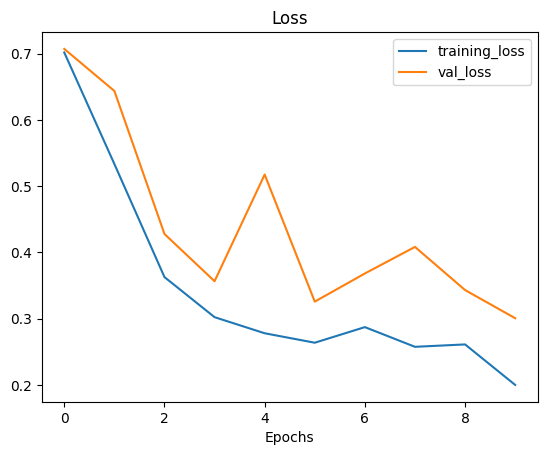

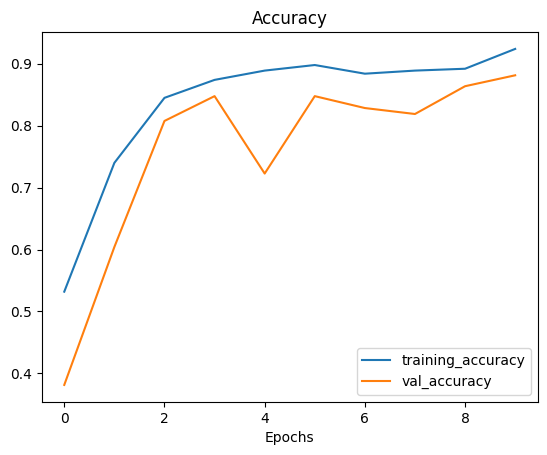

In [20]:
plot_loss_curves(history)

In [21]:
model.save('kesz')

In [22]:
# Load in a model and evaluate it
model2 = tf.keras.models.load_model("kesz")
#model2.evaluate(test_data)
test_loss, test_accuracy = model2.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

20/20 [==============================] - 30s 1s/step - loss: 0.3006 - accuracy: 0.8814
Test Loss: 0.3006
Test Accuracy: 0.8814


In [23]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)
    # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3) #tensor formatum
    # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = tf.expand_dims(img, axis=0)
  #img  = img[...,::-1]
  img -= [103, 116, 123]
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [24]:
image = load_and_prep_image("/content/XRAY/train/NORMAL/IM-0115-0001.jpeg")

In [25]:
pred = model.predict(image)

1/1 [==============================] - 0s 167ms/step


In [26]:
pred[0]

array([0.4707188], dtype=float32)

In [27]:
np.argmax(pred[0])

0

In [28]:
pred_class = class_names[np.argmax(pred[0])]
pred_class

'NORMAL'